# Fase 3 – Ingeniería de características y análisis multivariado

En esta fase construimos un **dataset enriquecido** a partir del conjunto binario limpio generado en la Fase 2 (clases `CONFIRMED` y `FALSE_POSITIVE`). El objetivo principal es:

- Diseñar **nuevas características físicas derivadas** (transformaciones logarítmicas y relaciones físico-intuitivas).
- Aplicar **técnicas multivariadas** como PCA y clustering para entender la estructura del espacio de características.
- Generar un archivo enriquecido que servirá como **entrada directa para los modelos supervisados de la Fase 4**.

A lo largo del cuaderno iremos encadenando:
1. Carga del dataset limpio.
2. Ingeniería de características.
3. Estandarización + PCA.
4. Clustering exploratorio.
5. Guardado del dataset enriquecido.

## 1. Imports y configuración de gráficos

En esta sección se importan las librerías de análisis numérico, visualización, preprocesamiento (imputación, escalado), PCA y K-Means. También se configura el estilo de gráficos para mantener coherencia con las fases anteriores.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)
pd.set_option("display.max_columns", 100)

print("Librerías cargadas.")

Librerías cargadas.


## 2. Carga del dataset limpio (CONFIRMED vs FALSE POSITIVE)

Aquí cargamos el dataset binario previamente generado en la Fase 2, donde:

- Solo se mantienen registros con disposiciones `CONFIRMED` y `FALSE_POSITIVE`.
- Ya se han aplicado filtros básicos de limpieza y selección de columnas.

El objetivo de este bloque es **confirmar la estructura del dataset** (número de filas, columnas y tipos de datos) y disponerlo como punto de partida para la ingeniería de características de esta fase.


In [ ]:
file_path = "/content/exoplanet_koi_binary_clean_eda.csv"
df = pd.read_csv(file_path)

print("Dimensiones del dataset original limpio:")
print("Filas :", df.shape[0])
print("Cols  :", df.shape[1])
df.head()

Dimensiones del dataset original limpio:
Filas : 7585
Cols  : 44


,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_srho,koi_prad,koi_incl,koi_teq,koi_insol,koi_dor,koi_ldm_coeff2,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_fwm_stat_sig,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky,is_confirmed
0,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,3.20796,2.26,89.66,793.0,93.59,24.810,0.2291,5.135849,28.470820,35.8,2,142.0,1.0,0.6864,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,0.002,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320,1
1,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,3.02368,2.83,89.57,443.0,9.11,77.900,0.2291,7.027669,20.109507,25.8,2,25.0,2.0,0.0023,5455.0,4.467,0.14,0.927,0.919,291.93423,48.141651,15.347,0.003,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500,1
2,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,0.22080,33.46,67.09,1395.0,891.96,3.278,0.2865,39.066550,541.895100,505.6,1,621.0,1.0,0.0000,5805.0,4.564,-0.52,0.791,0.836,285.53461,48.285210,15.597,0.000,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276,0
3,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,1.98635,2.75,85.41,1406.0,926.16,8.750,0.2844,4.749945,33.191900,40.9,1,515.0,1.0,0.3090,6031.0,4.438,0.07,1.046,1.095,288.75488,48.226200,15.509,0.733,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070,1
4,1.000,0,0,0,0,11.094321,171.201160,0.538,4.59450,1517.5,0.67324,3.90,88.11,835.0,114.81,16.360,0.2889,9.046456,55.204865,66.5,3,95.0,1.0,0.0975,6046.0,4.486,-0.08,0.972,1.053,296.28613,48.224670,15.714,NaN,-0.120,0.140,0.00004,NaN,0.040,-0.070,0.080,-0.020,-0.080,0.080,1


## 3. Definición de variable objetivo y revisión general

En esta sección:

- Se define explícitamente la variable objetivo binaria `is_confirmed`, que indica si un candidato KOI es un **exoplaneta confirmado (1)** o un **falso positivo (0)**.
- Se seleccionan las **variables físicas base** (periodo orbital, radio del planeta, temperatura de equilibrio, insolación, profundidad del tránsito, etc.) que alimentarán la construcción de nuevas features.

Además, se revisa la distribución de la variable objetivo para comprobar el **desbalance de clases**, aspecto clave para interpretar posteriormente las métricas de los modelos.


In [ ]:
target_col = "is_confirmed"   # 1 = CONFIRMED, 0 = FALSE POSITIVE

# Todas las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Features = todas las numéricas menos la etiqueta
feature_cols = [c for c in numeric_cols if c != target_col]

print("Número de features numéricas:", len(feature_cols))
print("Ejemplo de features:", feature_cols[:10])

print("\nTop 10 columnas con mayor % de NaN:")
print(
    df[feature_cols]
    .isnull()
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("\nEstadísticos descriptivos de algunas variables físicas:")
cols_show = [c for c in ["koi_prad", "koi_period", "koi_teq", "koi_insol", "koi_steff"] if c in feature_cols]
df[cols_show].describe()

Número de features numéricas: 43
Ejemplo de features: ['koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth']

Top 10 columnas con mayor % de NaN:
koi_fwm_stat_sig    0.126829
koi_bin_oedp_sig    0.119974
koi_score           0.119974
koi_fwm_prao        0.098352
koi_fwm_pdeco       0.094661
koi_max_sngle_ev    0.089782
koi_num_transits    0.089782
koi_max_mult_ev     0.089782
koi_dicco_mra       0.066974
koi_dicco_mdec      0.066974
dtype: float64

Estadísticos descriptivos de algunas variables físicas:


,koi_prad,koi_period,koi_teq,koi_insol,koi_steff
count,7326.000000,7585.000000,7326.000000,7.366000e+03,7326.000000
mean,104.169379,51.660971,1154.306306,9.392205e+03,5715.973928
std,3180.483497,111.838381,900.618618,1.781856e+05,819.235213
min,0.080000,0.241843,92.000000,2.000000e-02,2661.000000
25%,1.500000,2.243041,581.000000,2.720500e+01,5313.000000
50%,2.620000,8.073941,933.000000,1.804650e+02,5774.000000
75%,24.185000,30.552897,1481.750000,1.151240e+03,6116.750000
max,200346.000000,1071.232624,14667.000000,1.094755e+07,15896.000000


## 4. Transformaciones logarítmicas en variables sesgadas

Muchas variables físicas (por ejemplo, el periodo orbital o la profundidad del tránsito) presentan distribuciones **altamente sesgadas**. En este bloque:

- Se aplican transformaciones del tipo `log(1 + x)` a las variables más extremas.
- Se generan nuevas columnas como `log_koi_period`, `log_koi_prad`, `log_koi_teq`, `log_koi_insol` y `log_koi_depth`.

El objetivo es **reducir la asimetría** de las distribuciones para facilitar el aprendizaje de los modelos y mejorar la estabilidad numérica en fases posteriores.


In [ ]:
df_feat = df.copy()  # trabajaremos sobre df_feat para enriquecer variables

log_vars = ["koi_period", "koi_prad", "koi_teq", "koi_insol", "koi_depth"]
nuevas_log = []

for col in log_vars:
    if col in df_feat.columns:
        new_name = f"log_{col}"
        df_feat[new_name] = np.log1p(df_feat[col])  # log(1 + x) evita problemas con 0
        nuevas_log.append(new_name)

print("Variables logarítmicas creadas:")
print(nuevas_log)

print("\nDimensiones de df_feat tras añadir logs:", df_feat.shape)

Variables logarítmicas creadas:
['log_koi_period', 'log_koi_prad', 'log_koi_teq', 'log_koi_insol', 'log_koi_depth']

Dimensiones de df_feat tras añadir logs: (7585, 49)


## 5. Features físicas derivadas (densidad estelar y razón de radios)

Además de las transformaciones logarítmicas, en esta sección se construyen **características físico-intuitivas** como:

- Una aproximación de la **densidad estelar**, combinando masa y radio de la estrella.
- La **razón de radios** planeta/estrella, que está directamente relacionada con la profundidad del tránsito.

Estas nuevas variables aportan **información agregada** que puede ser más fácil de explotar por los modelos que las magnitudes originales aisladas.


In [ ]:
# Densidad estelar aproximada: rho ~ M / R^3 (M y R en unidades solares)
if "koi_smass" in df_feat.columns and "koi_srad" in df_feat.columns:
    df_feat["stellar_density"] = df_feat["koi_smass"] / (df_feat["koi_srad"] ** 3)
    print("Feature 'stellar_density' creada.")
else:
    df_feat["stellar_density"] = np.nan
    print("No se encontraron koi_smass o koi_srad. 'stellar_density' se llena con NaN.")

# Razón radio planeta / radio estrella (aprox).
# koi_prad en radios terrestres, koi_srad en radios solares.
if "koi_prad" in df_feat.columns and "koi_srad" in df_feat.columns:
    RSUN_IN_REARTH = 109.2  # 1 R_sun ≈ 109.2 R_earth
    df_feat["planet_to_star_radius_ratio"] = df_feat["koi_prad"] / (df_feat["koi_srad"] * RSUN_IN_REARTH)
    print("Feature 'planet_to_star_radius_ratio' creada.")
else:
    df_feat["planet_to_star_radius_ratio"] = np.nan
    print("No se encontraron koi_prad o koi_srad. 'planet_to_star_radius_ratio' se llena con NaN.")

print("\nResumen de las nuevas features físicas:")
df_feat[["stellar_density", "planet_to_star_radius_ratio"]].describe()

Feature 'stellar_density' creada.
Feature 'planet_to_star_radius_ratio' creada.

Resumen de las nuevas features físicas:


,stellar_density,planet_to_star_radius_ratio
count,7326.000000,7326.000000
mean,1.242022,0.293333
std,2.353889,3.155388
min,0.000000,0.001334
25%,0.439773,0.013245
50%,1.000000,0.023847
75%,1.531265,0.197229
max,60.221821,99.870718


## 6. Resumen de features enriquecidas

En este bloque se arma el dataframe final de características (`df_feat`), que incluye:

- Variables físicas originales seleccionadas.
- Transformaciones logarítmicas.
- Variables derivadas (densidad, razón de radios, etc.).
- La etiqueta binaria `is_confirmed`.

Se muestran las primeras filas y estadísticas básicas para **verificar que las transformaciones se han aplicado correctamente** y que no se introdujeron inconsistencias.


In [ ]:
numeric_cols_enriched = df_feat.select_dtypes(include=[np.number]).columns.tolist()
feature_cols_enriched = [c for c in numeric_cols_enriched if c != target_col]

print("Total de features numéricas (originales + nuevas):", len(feature_cols_enriched))

print("\nNuevas columnas añadidas (logs y físicas):")
added_cols = [c for c in df_feat.columns if c.startswith("log_")] + [
    "stellar_density",
    "planet_to_star_radius_ratio"
]
print(added_cols)

df_feat[added_cols].head()

Total de features numéricas (originales + nuevas): 50

Nuevas columnas añadidas (logs y físicas):
['log_koi_period', 'log_koi_prad', 'log_koi_teq', 'log_koi_insol', 'log_koi_depth', 'stellar_density', 'planet_to_star_radius_ratio']


,log_koi_period,log_koi_prad,log_koi_teq,log_koi_insol,log_koi_depth,stellar_density,planet_to_star_radius_ratio
0,2.350235,1.181727,6.677083,4.549552,6.424545,1.153656,0.022326
1,4.014911,1.342865,6.095825,2.313525,6.775138,1.153656,0.027957
2,1.006845,3.539799,7.241366,6.794542,8.997172,1.689183,0.387371
3,1.260048,1.321756,7.249215,6.832126,6.404071,0.956795,0.024076
4,2.492736,1.589235,6.728629,4.751951,7.325478,1.146647,0.036743


## 7. Imputación + estandarización de features enriquecidas

Antes de aplicar PCA y clustering, es necesario que todas las variables numéricas:

- Estén libres de valores faltantes (se utiliza un **imputador simple**).
- Se encuentren en escalas comparables (se aplica **estandarización** con media 0 y desviación estándar 1).

Este preprocesamiento es fundamental porque tanto **PCA** como **K-Means** son sensibles a la escala de las variables. Aquí se construyen las matrices preprocesadas que se utilizarán en las siguientes secciones.


In [ ]:
X_enriched = df_feat[feature_cols_enriched]
y = df_feat[target_col]

print("Forma de X_enriched:", X_enriched.shape)
print("NaN totales en X_enriched antes de imputar:", X_enriched.isnull().sum().sum())

# Imputación por mediana (columna a columna)
imputer = SimpleImputer(strategy="median")
X_imp = imputer.fit_transform(X_enriched)

# Estandarización (media 0, var 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

# Lo convertimos otra vez en DataFrame para comodidad
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols_enriched, index=df_feat.index)

print("Forma de X_scaled_df:", X_scaled_df.shape)
print("NaN en X_scaled_df:", np.isnan(X_scaled_df.values).sum())

Forma de X_enriched: (7585, 50)
NaN totales en X_enriched antes de imputar: 15676
Forma de X_scaled_df: (7585, 50)
NaN en X_scaled_df: 0


## 8. PCA completo y tabla de varianza explicada

En esta sección se ajusta un **PCA sobre todas las features estandarizadas** con el objetivo de:

- Medir cuánta varianza explican las primeras componentes principales.
- Identificar posibles **redundancias** o correlaciones fuertes entre variables.

Se presenta una tabla con la **varianza explicada por componente**, que sirve como base para decidir cuántas componentes son suficientes para representar la mayor parte de la estructura del dataset.


In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled_df)

explained_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

pca_table = pd.DataFrame({
    "Componente": np.arange(1, len(explained_var) + 1),
    "Varianza_exp": explained_var,
    "Varianza_acum": cum_var
})

print("Primeras 10 componentes principales:")
pca_table.head(10)

Primeras 10 componentes principales:


,Componente,Varianza_exp,Varianza_acum
0,1,0.133183,0.133183
1,2,0.104898,0.238081
2,3,0.068625,0.306706
3,4,0.060611,0.367317
4,5,0.050615,0.417932
5,6,0.046825,0.464757
6,7,0.041387,0.506144
7,8,0.039814,0.545958
8,9,0.029854,0.575812
9,10,0.029045,0.604857


## 9. Scree plot (varianza acumulada)

Aquí se genera el clásico **scree plot**, que muestra la varianza **acumulada** en función del número de componentes principales.

Este gráfico permite:

- Visualizar el punto donde la curva comienza a “aplanarse”.
- Justificar, de forma gráfica, una elección razonable del número de componentes a conservar (por ejemplo, las primeras 2–3 componentes si ya capturan un porcentaje alto de la varianza total).


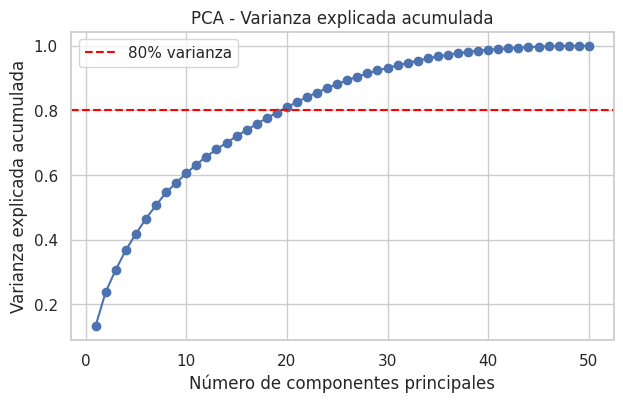

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, len(cum_var) + 1), cum_var, marker="o")
plt.axhline(0.8, color="red", linestyle="--", label="80% varianza")
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza explicada acumulada")
plt.title("PCA - Varianza explicada acumulada")
plt.legend()
plt.grid(True)
plt.show()

## 10. PCA a 2 componentes para visualización por clase

Utilizando las dos primeras componentes principales del PCA, se proyectan todos los candidatos KOI en un **plano 2D** y se colorean según la clase (`is_confirmed`).

Esta visualización permite:

- Observar si las clases tienden a separarse en el espacio reducido.
- Detectar regiones donde los exoplanetas confirmados y los falsos positivos se mezclan o se diferencian claramente.

La figura correspondiente puede utilizarse directamente en el paper como **gráfico de PCA** (Figura \ref{fig:pca}).


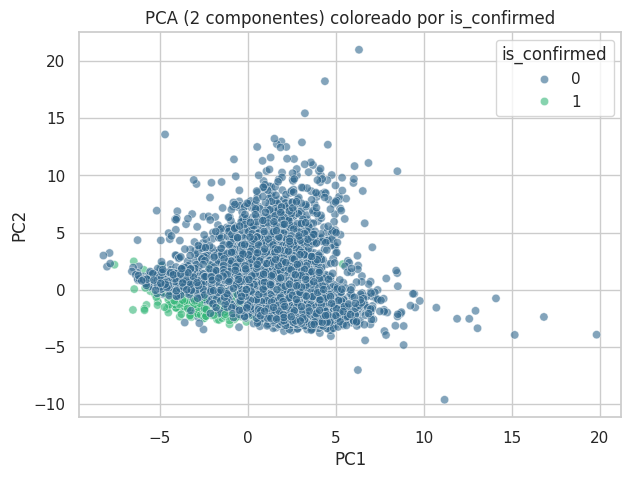

Varianza explicada por PC1 y PC2: [0.13318297 0.10489784]


In [ ]:
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled_df)

pca2_df = pd.DataFrame({
    "PC1": X_pca2[:, 0],
    "PC2": X_pca2[:, 1],
    "is_confirmed": y.values
})

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=pca2_df,
    x="PC1",
    y="PC2",
    hue="is_confirmed",
    palette="viridis",
    alpha=0.6
)
plt.title("PCA (2 componentes) coloreado por is_confirmed")
plt.show()

print("Varianza explicada por PC1 y PC2:", pca_2.explained_variance_ratio_)

## 11. Preparar datos para clustering (solo exoplanetas confirmados)

En esta sección se restringe el análisis de clustering a la **subpoblación de exoplanetas confirmados** (`is_confirmed = 1`), con el fin de:

- Explorar si dentro de la clase positiva existen **subgrupos naturales** (por ejemplo, tipos de exoplanetas).
- Trabajar con un conjunto más homogéneo para aplicar K-Means.

Se vuelve a estandarizar esta submuestra para garantizar que el clustering no se vea afectado por diferencias de escala entre variables.


In [ ]:
confirmed_mask = df_feat[target_col] == 1

# Subconjunto físico-intuitivo para clusters
cluster_features = [
    "log_koi_prad",
    "log_koi_period",
    "log_koi_teq",
    "log_koi_insol",
    "stellar_density",
    "planet_to_star_radius_ratio"
]

# Nos quedamos solo con las que existan en el dataset
cluster_features = [f for f in cluster_features if f in df_feat.columns]
print("Features usadas para clustering:", cluster_features)

X_cluster_raw = df_feat.loc[confirmed_mask, cluster_features].copy()
print("Dimensiones de X_cluster_raw (solo confirmados):", X_cluster_raw.shape)

# Imputación + escalado específicos para clustering
cluster_imputer = SimpleImputer(strategy="median")
cluster_scaler = StandardScaler()

X_cluster_imp = cluster_imputer.fit_transform(X_cluster_raw)
X_cluster_scaled = cluster_scaler.fit_transform(X_cluster_imp)

print("NaN en X_cluster_scaled:", np.isnan(X_cluster_scaled).sum())

Features usadas para clustering: ['log_koi_prad', 'log_koi_period', 'log_koi_teq', 'log_koi_insol', 'stellar_density', 'planet_to_star_radius_ratio']
Dimensiones de X_cluster_raw (solo confirmados): (2746, 6)
NaN en X_cluster_scaled: 0


## 12. K-Means con k = 3 clusters

En esta parte se aplica **K-Means** con \(k = 3\) clusters sobre los exoplanetas confirmados:

- Se ajusta el modelo de clustering en el espacio de características estandarizadas.
- Se asigna a cada exoplaneta confirmado una etiqueta de cluster.
- Se construye una tabla de **frecuencias de cluster** para tener una primera idea de cómo se distribuyen los objetos.

Este paso permite estudiar la posible existencia de **subpoblaciones** dentro de la clase de exoplanetas confirmados.


In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

unique, counts = np.unique(cluster_labels, return_counts=True)
print("Conteo de objetos por cluster:")
for c, n in zip(unique, counts):
    print(f"Cluster {c}: {n} planetas confirmados")

cluster_df = X_cluster_raw.copy()
cluster_df["cluster"] = cluster_labels
cluster_df.head()

Conteo de objetos por cluster:
Cluster 0: 1131 planetas confirmados
Cluster 1: 116 planetas confirmados
Cluster 2: 1499 planetas confirmados


,log_koi_prad,log_koi_period,log_koi_teq,log_koi_insol,stellar_density,planet_to_star_radius_ratio,cluster
0,1.181727,2.350235,6.677083,4.549552,1.153656,0.022326,2
1,1.342865,4.014911,6.095825,2.313525,1.153656,0.027957,0
3,1.321756,1.260048,7.249215,6.832126,0.956795,0.024076,2
4,1.589235,2.492736,6.728629,4.751951,1.146647,0.036743,2
5,1.327075,1.635970,7.057037,6.060641,1.146647,0.026097,2


## 13. Clusters en 2D (PCA local sobre confirmados)

Aquí se proyectan únicamente los **exoplanetas confirmados** en un plano de 2 componentes principales calculadas sobre esa submuestra, y se colorean según el cluster asignado por K-Means.

La visualización permite:

- Ver si los clusters están bien separados en el espacio reducido.
- Interpretar la forma y estructura de los grupos (por ejemplo, si hay un cluster de periodos cortos y otro de periodos largos).

Esta figura puede ser candidata a incluirse en el informe como evidencia de la **estructura interna de la clase positiva**.


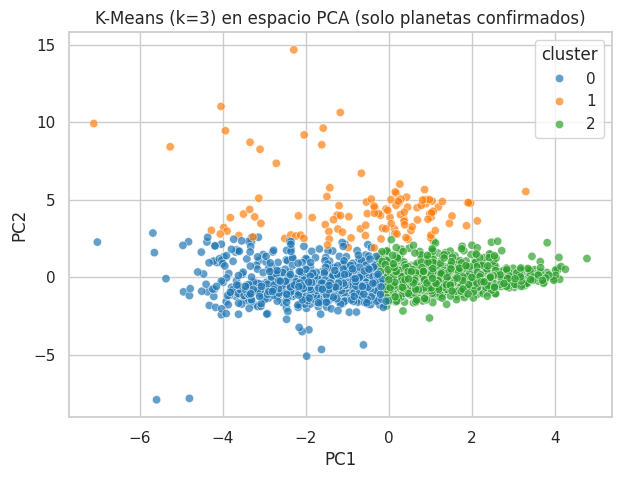

In [ ]:
pca_cluster = PCA(n_components=2)
cluster_pcs = pca_cluster.fit_transform(X_cluster_scaled)

cluster_plot_df = pd.DataFrame({
    "PC1": cluster_pcs[:, 0],
    "PC2": cluster_pcs[:, 1],
    "cluster": cluster_labels
})

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=cluster_plot_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="tab10",
    alpha=0.7
)
plt.title("K-Means (k=3) en espacio PCA (solo planetas confirmados)")
plt.show()

## 14. Centros de los clusters en unidades originales

En este bloque se transforman los **centroides de K-Means** desde el espacio estandarizado de vuelta a las **unidades originales** de las variables físicas.

Con ello se puede:

- Interpretar cada cluster en términos de magnitudes astrofísicas (periodo orbital típico, radio del planeta, temperatura de equilibrio, etc.).
- Relacionar los clusters con posibles **tipos físicos de exoplanetas** (por ejemplo, planetas calientes, templados, con tránsitos muy profundos, etc.).


In [ ]:
centers_scaled = kmeans.cluster_centers_
centers_unscaled = cluster_scaler.inverse_transform(centers_scaled)

centers_df = pd.DataFrame(centers_unscaled, columns=cluster_features)
centers_df.index = [f"Cluster_{i}" for i in range(k)]

print("Centros de los clusters (en unidades originales):")
centers_df

Centros de los clusters (en unidades originales):


,log_koi_prad,log_koi_period,log_koi_teq,log_koi_insol,stellar_density,planet_to_star_radius_ratio
Cluster_0,1.282109,3.575253,6.200239,2.763930,1.902134,0.028528
Cluster_1,2.612652,2.239848,6.881975,5.381372,1.038940,0.111670
Cluster_2,1.045302,1.944172,6.923098,5.529118,1.111939,0.017258


## 15. Guardar dataset enriquecido

Finalmente, se construye un dataframe consolidado que incluye:

- Todas las características físicas originales seleccionadas.
- Features transformadas y derivadas.
- Etiquetas de clase `is_confirmed`.
- (Opcionalmente) información sobre clusters y componentes principales.

Este dataset se guarda como `exoplanet_koi_binary_enriched.csv` y servirá como **entrada principal para la Fase 4 (modelado supervisado)**, garantizando coherencia entre la exploración multivariada y los experimentos de clasificación.


In [ ]:
output_file = "exoplanet_koi_binary_enriched.csv"
df_feat.to_csv(output_file, index=False)

print("Dataset enriquecido guardado como:", output_file)
print("Dimensiones de df_feat:", df_feat.shape)

Dataset enriquecido guardado como: exoplanet_koi_binary_enriched.csv
Dimensiones de df_feat: (7585, 51)


## Conclusiones de la Fase 3 – Características y análisis multivariado

En esta fase se construyó un **dataset enriquecido** a partir del catálogo KOI binario, incorporando:

- Transformaciones logarítmicas sobre variables fuertemente sesgadas.
- Features físico-intuitivas (densidad estelar aproximada, razón de radios, etc.).
- Representaciones reducidas mediante PCA y etiquetas de clusters sobre la subpoblación de exoplanetas confirmados.

El análisis de PCA permitió identificar que un número reducido de componentes concentra una fracción importante de la varianza, lo que indica la presencia de **correlaciones fuertes entre variables físicas**. Además, el clustering con K-Means reveló posibles **subgrupos internos** dentro de los exoplanetas confirmados, lo que abre la puerta a estudios más detallados de poblaciones específicas.

El resultado principal de esta fase es el archivo `exoplanet_koi_binary_enriched.csv`, que funcionará como **entrada estructurada y consistente** para los modelos supervisados de la Fase 4. De este modo, el pipeline de ciencia de datos avanza desde la limpieza básica (Fases 1–2) hacia un espacio de características más informativo y adecuado para la clasificación automática de candidatos a exoplanetas.
